In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix
import nltk

import pickle

In [2]:
#Load in data and split for train and test sets
df = pd.read_csv(r'C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Data\clean_dataset.csv')
X_train, X_test, y_train, y_test = train_test_split(df['clean_text_sl'], df['Annotation'], test_size=0.25, random_state=12)
                                                       
df.head(5)

,id,text,Annotation,clean_text,clean_text_sl,Hate
0,5.969655e+17,I just found the *perfect* rental. Why can't m...,Neither,i just found the perfect rental why cant my le...,found perfect rental cant lease right,0
1,5.758918e+17,"@wetsprocket every time they ""discover"" anythi...",Neither,every time they discover anything its either ...,every time discover anything either incorrect ...,0
2,5.952595e+17,ok time to write code bbl.\n\nmaking a new thing.,Neither,ok time to write code bbl\n\nmaking a new thing,ok time write code bbl making new thing,0
3,5.723449e+17,Refined dessert! NOT #MKR,Neither,refined dessert not mkr,refined dessert mkr,0
4,5.681320e+17,@furt1v3ly @ClarkHat One of the best things an...,Neither,one of the best things anyone can do to impr...,one best thing anyone improve understanding gr...,0


In [3]:
#create count matrix
counts = CountVectorizer()
count_train = counts.fit_transform(X_train)
count_test = counts.transform(X_test)

## Default NB

In [4]:
default_NB = GaussianNB(var_smoothing=1e-9)

In [5]:
# train classifier
print("training...")
default_NB.fit(count_train.toarray(), y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
default_NB_test_preds = default_NB.predict(count_test.toarray())
print("complete.")

training...
complete.
predicting...
complete.


In [6]:
NB_metrics = {}
default_NB_precision = precision_score(y_test, default_NB_test_preds, average='macro')
default_NB_recall = recall_score(y_test, default_NB_test_preds, average='macro')
default_NB_macro_f1_score = f1_score(y_test, default_NB_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(default_NB_precision))
print('Recall: {:.3}'.format(default_NB_recall))
print('Macro F1 Score: {:.3}'.format(default_NB_macro_f1_score))

NB_metrics['Default NB'] = {'precision': default_NB_precision, 'recall': default_NB_recall, 
                            'macro_f1': default_NB_macro_f1_score}

Model evaluation metrics
Precision: 0.347
Recall: 0.403
Macro F1 Score: 0.36


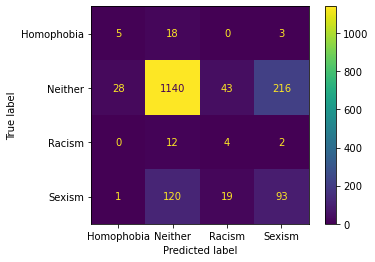

In [7]:
plot_confusion_matrix(default_NB, count_test.toarray(), y_test)

## Grid NB

In [8]:
grid_NB = GaussianNB()

grid_search_params = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_NB = GridSearchCV(grid_NB, grid_search_params, cv=5, scoring='f1_macro', verbose=3)

grid_NB.fit(count_train.toarray(), y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... var_smoothing=1.0, score=0.392, total=   1.2s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ................... var_smoothing=1.0, score=0.483, total=   1.2s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV] ................... var_smoothing=1.0, score=0.329, total=   1.3s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.297, total=   1.3s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.336, total=   1.3s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.322, total=   1.2s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.412, total=   1.2s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.292, total=   1.3s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.247, total=   1.2s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .

[CV] ... var_smoothing=0.08111308307896872, score=0.196, total=   1.1s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.217, total=   1.1s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.172, total=   1.1s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.210, total=   1.1s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.195, total=   1.1s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .... var_smoothing=0.0657933224657568, score=0.197, total=   1.1s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .... var_smoothing=0.0657933224657568, score=0.226, total=   1.1s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .

[CV] .. var_smoothing=0.008111308307896872, score=0.295, total=   1.2s
[CV] var_smoothing=0.008111308307896872 ..............................
[CV] .. var_smoothing=0.008111308307896872, score=0.286, total=   1.2s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.291, total=   1.1s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.297, total=   1.1s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.275, total=   1.1s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.301, total=   1.1s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.290, total=   1.1s
[CV] var_smoothing=0.005336699231206307 ..............................
[CV] .

[CV] . var_smoothing=0.0006579332246575676, score=0.397, total=   1.2s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.352, total=   1.2s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.336, total=   1.2s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.364, total=   1.2s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.402, total=   1.2s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.407, total=   1.2s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.362, total=   1.2s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] .

[CV] . var_smoothing=6.579332246575683e-05, score=0.345, total=   1.2s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.384, total=   1.2s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.391, total=   1.2s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.341, total=   1.2s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.310, total=   1.2s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.345, total=   1.3s
[CV] var_smoothing=4.328761281083062e-05 .............................
[CV] . var_smoothing=4.328761281083062e-05, score=0.384, total=   1.3s
[CV] var_smoothing=4.328761281083062e-05 .............................
[CV] .

[CV] . var_smoothing=5.336699231206313e-06, score=0.341, total=   1.2s
[CV] var_smoothing=5.336699231206313e-06 .............................
[CV] . var_smoothing=5.336699231206313e-06, score=0.310, total=   1.2s
[CV] var_smoothing=5.336699231206313e-06 .............................
[CV] . var_smoothing=5.336699231206313e-06, score=0.345, total=   1.2s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.384, total=   1.2s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.391, total=   1.2s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.341, total=   1.2s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.310, total=   1.2s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] .

[CV]  var_smoothing=4.3287612810830526e-07, score=0.384, total=   1.1s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.391, total=   1.1s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.341, total=   1.1s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.310, total=   1.1s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.345, total=   1.1s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  var_smoothing=3.5111917342151277e-07, score=0.384, total=   1.1s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  var_smoothing=3.5111917342151277e-07, score=0.391, total=   1.2s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  

[CV]  var_smoothing=4.3287612810830526e-08, score=0.310, total=   1.1s
[CV] var_smoothing=4.3287612810830526e-08 ............................
[CV]  var_smoothing=4.3287612810830526e-08, score=0.345, total=   1.2s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.384, total=   1.1s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.391, total=   1.1s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.341, total=   1.1s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.310, total=   1.2s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.345, total=   1.2s
[CV] var_smoothing=2.848035868435799e-08 .............................
[CV] .

[CV]  var_smoothing=3.5111917342151273e-09, score=0.391, total=   1.2s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.341, total=   1.2s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.310, total=   1.2s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.345, total=   1.2s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.384, total=   1.2s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.391, total=   1.2s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.341, total=   1.1s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 10.0min finished


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1_macro', verbose=3)

In [9]:
#print best score obtained and the parameters which obtained it
print('F1 Score:', grid_NB.best_score_)
print('Best Hyperparameters:', grid_NB.best_params_)
print('Model object with best parameters: ')
print(grid_NB.best_estimator_)

F1 Score: 0.36904191043413326
Best Hyperparameters: {'var_smoothing': 0.0006579332246575676}
Model object with best parameters: 
GaussianNB(var_smoothing=0.0006579332246575676)


In [10]:
# train classifier
print("training...")
grid_NB.best_estimator_.fit(count_train.toarray(), y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
NB_test_preds = grid_NB.best_estimator_.predict(count_test.toarray())
print("complete.")

training...
complete.
predicting...
complete.


In [11]:
grid_NB_precision = precision_score(y_test, NB_test_preds, average='macro')
grid_NB_recall = recall_score(y_test, NB_test_preds, average='macro')
grid_NB_macro_f1_score = f1_score(y_test, NB_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(grid_NB_precision))
print('Recall: {:.3}'.format(grid_NB_recall))
print('Macro F1 Score: {:.3}'.format(grid_NB_macro_f1_score))

NB_metrics['Grid NB'] = {'precision': grid_NB_precision, 'recall': grid_NB_recall, 
                            'macro_f1': grid_NB_macro_f1_score}

Model evaluation metrics
Precision: 0.34
Recall: 0.421
Macro F1 Score: 0.356


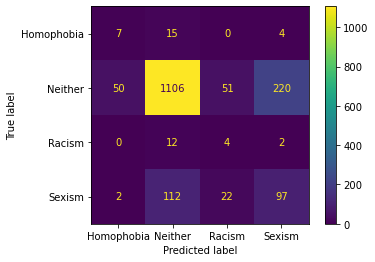

In [12]:
plot_confusion_matrix(grid_NB, count_test.toarray(), y_test)

In [13]:
#compare parameters
results = pd.DataFrame.from_dict(NB_metrics, orient='index')
results.to_csv(r"C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Results\NB_count_results_multi",
               index=False)
results

,precision,recall,macro_f1
Default NB,0.346891,0.403138,0.360276
Grid NB,0.339814,0.420704,0.356420


## without S/L preprocessing

In [14]:
#Load in data and split for train and test sets
df = pd.read_csv(r'C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Data\clean_dataset.csv')
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['Annotation'], test_size=0.25, random_state=12)
                                                       
df.head(5)

,id,text,Annotation,clean_text,clean_text_sl,Hate
0,5.969655e+17,I just found the *perfect* rental. Why can't m...,Neither,i just found the perfect rental why cant my le...,found perfect rental cant lease right,0
1,5.758918e+17,"@wetsprocket every time they ""discover"" anythi...",Neither,every time they discover anything its either ...,every time discover anything either incorrect ...,0
2,5.952595e+17,ok time to write code bbl.\n\nmaking a new thing.,Neither,ok time to write code bbl\n\nmaking a new thing,ok time write code bbl making new thing,0
3,5.723449e+17,Refined dessert! NOT #MKR,Neither,refined dessert not mkr,refined dessert mkr,0
4,5.681320e+17,@furt1v3ly @ClarkHat One of the best things an...,Neither,one of the best things anyone can do to impr...,one best thing anyone improve understanding gr...,0


In [15]:
#create count matrix
counts = CountVectorizer()
count_train = counts.fit_transform(X_train)
count_test = counts.transform(X_test)

## Default NB

In [16]:
default_NB = GaussianNB(var_smoothing=1e-9)

In [17]:
# train classifier
print("training...")
default_NB.fit(count_train.toarray(), y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
default_NB_test_preds = default_NB.predict(count_test.toarray())
print("complete.")

training...
complete.
predicting...
complete.


In [18]:
default_NB_precision = precision_score(y_test, default_NB_test_preds, average='macro')
default_NB_recall = recall_score(y_test, default_NB_test_preds, average='macro')
default_NB_macro_f1_score = f1_score(y_test, default_NB_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(default_NB_precision))
print('Recall: {:.3}'.format(default_NB_recall))
print('Macro F1 Score: {:.3}'.format(default_NB_macro_f1_score))

NB_metrics['Default NB - no SL preprocessing'] = {'precision': default_NB_precision, 'recall': default_NB_recall, 
                            'macro_f1': default_NB_macro_f1_score}

Model evaluation metrics
Precision: 0.362
Recall: 0.414
Macro F1 Score: 0.374


## Grid NB

In [19]:
grid_NB = GaussianNB()

grid_search_params = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_NB = GridSearchCV(grid_NB, grid_search_params, cv=5, scoring='f1_macro', verbose=3)

grid_NB.fit(count_train.toarray(), y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... var_smoothing=1.0, score=0.465, total=   1.4s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ................... var_smoothing=1.0, score=0.467, total=   1.3s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV] ................... var_smoothing=1.0, score=0.522, total=   1.3s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.465, total=   1.3s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.490, total=   1.4s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.565, total=   1.3s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.568, total=   1.3s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.477, total=   1.3s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.398, total=   1.3s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .

[CV] ... var_smoothing=0.08111308307896872, score=0.247, total=   1.4s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.271, total=   1.5s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.209, total=   1.5s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.212, total=   1.5s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.227, total=   1.5s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .... var_smoothing=0.0657933224657568, score=0.237, total=   1.4s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .... var_smoothing=0.0657933224657568, score=0.260, total=   1.4s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .

[CV] .. var_smoothing=0.008111308307896872, score=0.257, total=   1.2s
[CV] var_smoothing=0.008111308307896872 ..............................
[CV] .. var_smoothing=0.008111308307896872, score=0.244, total=   1.5s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.243, total=   1.4s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.263, total=   1.4s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.233, total=   1.4s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.261, total=   1.4s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.253, total=   1.4s
[CV] var_smoothing=0.005336699231206307 ..............................
[CV] .

[CV] . var_smoothing=0.0006579332246575676, score=0.332, total=   1.4s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.316, total=   1.4s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.348, total=   1.4s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.337, total=   1.4s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.345, total=   1.4s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.357, total=   1.3s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.329, total=   1.4s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] .

[CV] . var_smoothing=6.579332246575683e-05, score=0.357, total=   1.3s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.398, total=   1.4s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.391, total=   1.3s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.359, total=   1.3s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.321, total=   1.3s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.357, total=   1.3s
[CV] var_smoothing=4.328761281083062e-05 .............................
[CV] . var_smoothing=4.328761281083062e-05, score=0.398, total=   1.4s
[CV] var_smoothing=4.328761281083062e-05 .............................
[CV] .

[CV] . var_smoothing=5.336699231206313e-06, score=0.359, total=   1.3s
[CV] var_smoothing=5.336699231206313e-06 .............................
[CV] . var_smoothing=5.336699231206313e-06, score=0.321, total=   1.3s
[CV] var_smoothing=5.336699231206313e-06 .............................
[CV] . var_smoothing=5.336699231206313e-06, score=0.357, total=   1.4s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.398, total=   1.3s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.391, total=   1.3s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.359, total=   1.3s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.321, total=   1.3s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] .

[CV]  var_smoothing=4.3287612810830526e-07, score=0.398, total=   1.4s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.391, total=   1.4s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.359, total=   1.4s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.321, total=   1.3s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.357, total=   1.4s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  var_smoothing=3.5111917342151277e-07, score=0.398, total=   1.4s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  var_smoothing=3.5111917342151277e-07, score=0.391, total=   1.3s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  

[CV]  var_smoothing=4.3287612810830526e-08, score=0.321, total=   1.3s
[CV] var_smoothing=4.3287612810830526e-08 ............................
[CV]  var_smoothing=4.3287612810830526e-08, score=0.357, total=   1.3s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.398, total=   1.3s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.391, total=   1.4s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.359, total=   1.3s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.321, total=   1.3s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.357, total=   1.3s
[CV] var_smoothing=2.848035868435799e-08 .............................
[CV] .

[CV]  var_smoothing=3.5111917342151273e-09, score=0.391, total=   1.3s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.359, total=   1.3s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.321, total=   1.3s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.357, total=   1.3s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.398, total=   1.3s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.391, total=   1.3s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.359, total=   1.3s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 11.4min finished


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1_macro', verbose=3)

In [20]:
#print best score obtained and the parameters which obtained it
print('F1 Score:', grid_NB.best_score_)
print('Best Hyperparameters:', grid_NB.best_params_)
print('Model object with best parameters: ')
print(grid_NB.best_estimator_)

F1 Score: 0.5118124394200316
Best Hyperparameters: {'var_smoothing': 0.8111308307896871}
Model object with best parameters: 
GaussianNB(var_smoothing=0.8111308307896871)


In [21]:
# train classifier
print("training...")
grid_NB.best_estimator_.fit(count_train.toarray(), y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
NB_test_preds = grid_NB.best_estimator_.predict(count_test.toarray())
print("complete.")

training...
complete.
predicting...
complete.


In [22]:
grid_NB_precision = precision_score(y_test, NB_test_preds, average='macro')
grid_NB_recall = recall_score(y_test, NB_test_preds, average='macro')
grid_NB_macro_f1_score = f1_score(y_test, NB_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(grid_NB_precision))
print('Recall: {:.3}'.format(grid_NB_recall))
print('Macro F1 Score: {:.3}'.format(grid_NB_macro_f1_score))

NB_metrics['Grid NB - no SL preprocessing'] = {'precision': grid_NB_precision, 'recall': grid_NB_recall, 
                            'macro_f1': grid_NB_macro_f1_score}

Model evaluation metrics
Precision: 0.581
Recall: 0.488
Macro F1 Score: 0.525


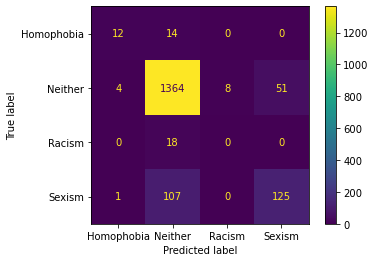

In [23]:
plot_confusion_matrix(grid_NB, count_test.toarray(), y_test)

In [24]:
#compare parameters
results = pd.DataFrame.from_dict(NB_metrics, orient='index')
results.to_csv(r"C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Results\NB_count_results_multi",
               index=False)
results

,precision,recall,macro_f1
Default NB,0.346891,0.403138,0.360276
Grid NB,0.339814,0.420704,0.356420
Default NB - no SL preprocessing,0.361512,0.414111,0.374201
Grid NB - no SL preprocessing,0.580907,0.488468,0.525111
